# Capstone Project - The Battle of the Neighborhoods (Week 1 - 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a Cafeteria. Specifically, this report will be targeted to stakeholders interested in opening an **Cafeteria** in **Delhi**, India.

Since there are lots of Cafe's in Delhi we will try to detect **locations that are not already crowded with self serving Cafeteria's**. We are also particularly interested in **all the areas within 500m radius of Metro Stations along Delhi Mtero Rail Corp. network**. We would also prefer locations **as close to Metro Station as possible**, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of metro stations in DMRC network ( included Rapid Metro Stations)
* number of existing Cafe/restaurants in the 500m radius of Metro Station (any type of Self Serving Restaurant/Cafe)
* number of and distance to nearby Cafeteria in the neighborhood, if any
* distance of neighborhood from Metro Stations

We decided to use regularly spaced grid of locations, centered around each Metro Station, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Google Maps API reverse geocoding**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of Berlin center will be obtained using **Google Maps API geocoding** of well known Berlin location (Alexanderplatz)

### Neighborhood Candidates

Let's create latitude & longitude coordinates for centroids of our candidate neighborhoods. We will create a grid of cells covering our area of interest which is aprox. 500 meters centered around each Metro Station of Delhi Metro.

Let's first find the Unique name of each Metro Station by Web Scraping the Metro Network Data from DMRC website using BeautifulSoup package and further Geo-Coding each using well known address and Google Maps geocoding API.

In [1]:
#Importing OS for setting working Environment
import os

os.getcwd()

'C:\\Users\\YOunG SOORMA'

In [2]:
#Changing Current Working Directory
os.chdir("E:\\DSP\\Coursera_Capstone-master")

In [3]:
#Importing Pandas and Numpy for Data-Frame's  related Manipulation 
import pandas as pd
import numpy as np
import time

#Importing urllib , requests and BeautifulSoup for Web-Scaping "delhimetrorail.info" website for Metro Stations
import requests
import urllib.request
from bs4 import BeautifulSoup

In [4]:
#Importing geopandas and geopy for Geocoding of Locations of Metro Stations
import geopandas
import geopy
from geopy.geocoders import Nominatim

In [5]:
#Importing Sklearn for Unsupervised Learning i.e. Clustering of Data
from sklearn.cluster import KMeans

In [6]:
#Importing matplotlib , Seaborn for effective Data Visualization and Folium for Map Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [7]:
#Initializing Target Website URL
url = 'https://delhimetrorail.info/delhi-metro-stations'

In [8]:
response = requests.get(url)

In [9]:
response

<Response [200]>

In [10]:
soup = BeautifulSoup(response.text, "html.parser")

In [11]:
soup


<!DOCTYPE html>

<html amp="" lang="en">
<head><title>
	Delhi Metro - list of all stations in delhi metro
</title><meta charset="utf-8"/><link href="/images/favicondelhimetro.ico" id="Link1" rel="shortcut icon"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="RRA Soft" name="Designer"/><meta content="Global" name="distribution"/><meta content="Index,Follow" name="Robots"/><meta content="Delhi" name="city"/><meta content="India" name="country"/>
<script async="" src="https://cdn.ampproject.org/v0.js"></script>
<script async="" custom-element="amp-analytics" src="https://cdn.ampproject.org/v0/amp-analytics-0.1.js"></script>
<script async="" custom-element="amp-ad" src="https://cdn.ampproject.org/v0/amp-ad-0.1.js"></script>
<script async="" custom-element="amp-auto-ads" src="https://cdn.ampproject.org/v0/amp-auto-ads-0.1.js">

In [12]:
line_count = 1
Place = [] 

for one_a_tag in soup.findAll('a'): #'a' tags are for links
    tag = list(one_a_tag)
    if (line_count>12 and line_count<326 ):
        print(tag[0],line_count)
        Place.append(tag[0])
        Place.append(line_count)
    line_count +=1

Shaheed Sthal(New Bus Adda) 13
Hindon River 14
Arthala 15
Mohan Nagar 16
Shyam park 17
Major Mohit Sharma 18
Raj Bagh 19
Shaheed Nagar 20
Dilshad Garden 21
Jhil Mil 22
Mansarovar Park 23
Shahdara 24
Welcome 25
Seelampur 26
Shastri Park 27
Kashmere Gate 28
Tis Hazari 29
Pul Bangash 30
Pratap Nagar 31
Shastri Nagar 32
Inderlok 33
Kanhaiya Nagar 34
Keshav Puram 35
Netaji Subash Place 36
Kohat Enclave 37
Pitam Pura 38
Rohini East 39
Rohini West 40
Rithala 41
Samaypur Badli 42
Rohini Sector 18-19 43
Haiderpur Badli Mor 44
Jahangirpuri 45
Adarsh Nagar 46
Azadpur 47
Model Town 48
Guru Tegh Bahadur Nagar 49
Vishwavidyalaya 50
Vidhan Sabha 51
Civil Lines 52
Kashmere Gate 53
Chandni Chowk 54
Red Fort 55
Chawri Bazar 56
Jama Masjid 57
New Delhi 58
Rajiv Chowk 59
Cannaught Place 60
Patel Chowk 61
 Jantar Mantar 62
Central Secretariat 63
Sansad Bhavan 64
Udyog Bhawan 65
Rashtrapati Bhavan 66
Lok Kalyan Marg 67
 Lodhi Gardens 68
Lodhi Gardens 69
Jorbagh 70
Safdarjung Tomb 71
Dilli Haat INA 72
AIIMS 

In [13]:
Place

['Shaheed Sthal(New Bus Adda)',
 13,
 'Hindon River',
 14,
 'Arthala',
 15,
 'Mohan Nagar',
 16,
 'Shyam park',
 17,
 'Major Mohit Sharma',
 18,
 'Raj Bagh',
 19,
 'Shaheed Nagar',
 20,
 'Dilshad Garden',
 21,
 'Jhil Mil',
 22,
 'Mansarovar Park',
 23,
 'Shahdara',
 24,
 'Welcome',
 25,
 'Seelampur',
 26,
 'Shastri Park',
 27,
 'Kashmere Gate',
 28,
 'Tis Hazari',
 29,
 'Pul Bangash',
 30,
 'Pratap Nagar',
 31,
 'Shastri Nagar',
 32,
 'Inderlok',
 33,
 'Kanhaiya Nagar',
 34,
 'Keshav Puram',
 35,
 'Netaji Subash Place',
 36,
 'Kohat Enclave',
 37,
 'Pitam Pura',
 38,
 'Rohini East',
 39,
 'Rohini West',
 40,
 'Rithala',
 41,
 'Samaypur Badli',
 42,
 'Rohini Sector 18-19',
 43,
 'Haiderpur Badli Mor',
 44,
 'Jahangirpuri',
 45,
 'Adarsh Nagar',
 46,
 'Azadpur',
 47,
 'Model Town',
 48,
 'Guru Tegh Bahadur Nagar',
 49,
 'Vishwavidyalaya',
 50,
 'Vidhan Sabha',
 51,
 'Civil Lines',
 52,
 'Kashmere Gate',
 53,
 'Chandni Chowk',
 54,
 'Red Fort',
 55,
 'Chawri Bazar',
 56,
 'Jama Masjid',
 

In [14]:
i = 0
j=1

station = []
seq_count = []

while(i<626):
    print(Place[i])
    print(Place[j])
    station.append(Place[i])
    seq_count.append(Place[j])
    
    i=i+2
    j=i+1

Shaheed Sthal(New Bus Adda)
13
Hindon River
14
Arthala
15
Mohan Nagar
16
Shyam park
17
Major Mohit Sharma
18
Raj Bagh
19
Shaheed Nagar
20
Dilshad Garden
21
Jhil Mil
22
Mansarovar Park
23
Shahdara
24
Welcome
25
Seelampur
26
Shastri Park
27
Kashmere Gate
28
Tis Hazari
29
Pul Bangash
30
Pratap Nagar
31
Shastri Nagar
32
Inderlok
33
Kanhaiya Nagar
34
Keshav Puram
35
Netaji Subash Place
36
Kohat Enclave
37
Pitam Pura
38
Rohini East
39
Rohini West
40
Rithala
41
Samaypur Badli
42
Rohini Sector 18-19
43
Haiderpur Badli Mor
44
Jahangirpuri
45
Adarsh Nagar
46
Azadpur
47
Model Town
48
Guru Tegh Bahadur Nagar
49
Vishwavidyalaya
50
Vidhan Sabha
51
Civil Lines
52
Kashmere Gate
53
Chandni Chowk
54
Red Fort
55
Chawri Bazar
56
Jama Masjid
57
New Delhi
58
Rajiv Chowk
59
Cannaught Place
60
Patel Chowk
61
 Jantar Mantar
62
Central Secretariat
63
Sansad Bhavan
64
Udyog Bhawan
65
Rashtrapati Bhavan
66
Lok Kalyan Marg
67
 Lodhi Gardens
68
Lodhi Gardens
69
Jorbagh
70
Safdarjung Tomb
71
Dilli Haat INA
72
AIIMS


In [15]:
station

['Shaheed Sthal(New Bus Adda)',
 'Hindon River',
 'Arthala',
 'Mohan Nagar',
 'Shyam park',
 'Major Mohit Sharma',
 'Raj Bagh',
 'Shaheed Nagar',
 'Dilshad Garden',
 'Jhil Mil',
 'Mansarovar Park',
 'Shahdara',
 'Welcome',
 'Seelampur',
 'Shastri Park',
 'Kashmere Gate',
 'Tis Hazari',
 'Pul Bangash',
 'Pratap Nagar',
 'Shastri Nagar',
 'Inderlok',
 'Kanhaiya Nagar',
 'Keshav Puram',
 'Netaji Subash Place',
 'Kohat Enclave',
 'Pitam Pura',
 'Rohini East',
 'Rohini West',
 'Rithala',
 'Samaypur Badli',
 'Rohini Sector 18-19',
 'Haiderpur Badli Mor',
 'Jahangirpuri',
 'Adarsh Nagar',
 'Azadpur',
 'Model Town',
 'Guru Tegh Bahadur Nagar',
 'Vishwavidyalaya',
 'Vidhan Sabha',
 'Civil Lines',
 'Kashmere Gate',
 'Chandni Chowk',
 'Red Fort',
 'Chawri Bazar',
 'Jama Masjid',
 'New Delhi',
 'Rajiv Chowk',
 'Cannaught Place',
 'Patel Chowk',
 ' Jantar Mantar',
 'Central Secretariat',
 'Sansad Bhavan',
 'Udyog Bhawan',
 'Rashtrapati Bhavan',
 'Lok Kalyan Marg',
 ' Lodhi Gardens',
 'Lodhi Gardens

In [16]:
# dictionary of lists  
Dictt = {'station': station, 'seq_count': seq_count}  
    
Stations = pd.DataFrame(Dictt) 

In [17]:
Stations

station  seq_count
0    Shaheed Sthal(New Bus Adda)         13
1                   Hindon River         14
2                        Arthala         15
3                    Mohan Nagar         16
4                     Shyam park         17
..                           ...        ...
308                 GNIDA Office        321
309          Depot Greater Noida        322
310                       Dwarka        323
311                       Nangli        324
312                    Najafgarh        325

[313 rows x 2 columns]

In [18]:
Stations.to_csv("Stations.csv")  #CSV file containing all the Metro Station Names fetched from target DMRC Website

### Geo-Coding 

Let's create latitude & longitude coordinates for centroids of our Metro neighborhoods using grid of cells covering our area of interest which is aprox. 500 meters centered around each Metro Station of Delhi Metro.

Let's first find the latitude & longitude of each Metro Station , using specific, well known address and Google Maps geocoding API.

In [19]:
locator = Nominatim(user_agent = "myGeocoder")
location = locator.geocode("New Delhi, India")

In [20]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 28.6138954, Longitude = 77.2090057


In [21]:
station_mark = []
station_seq = []
Longitude = []
Latitude = []
for i in Stations.values:
    try: # because some links are broken
        location = locator.geocode( i[0] + ", India" )
        
        print("Station : ", i[0] , "Sequence Number : ",  i[1] , "Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))
        station_mark.append(i[0])
        station_seq.append(i[1])
        Longitude.append(location.longitude)
        Latitude.append(location.latitude)
    except:
        continue

Station :  Shaheed Sthal(New Bus Adda) Sequence Number :  13 Latitude = 28.67052875, Longitude = 77.41580947285303
Station :  Hindon River Sequence Number :  14 Latitude = 28.6734288, Longitude = 77.4065374
Station :  Arthala Sequence Number :  15 Latitude = 28.676999, Longitude = 77.3918919
Station :  Mohan Nagar Sequence Number :  16 Latitude = 28.60631905, Longitude = 77.10608184860985
Station :  Shyam park Sequence Number :  17 Latitude = 28.698807199999997, Longitude = 77.26846412516488
Station :  Kashmere Gate Sequence Number :  28 Latitude = 28.666814100000003, Longitude = 77.22905486082311
Station :  Tis Hazari Sequence Number :  29 Latitude = 28.6671626, Longitude = 77.2166306
Station :  Pul Bangash Sequence Number :  30 Latitude = 28.6664068, Longitude = 77.2074156
Station :  Pratap Nagar Sequence Number :  31 Latitude = 28.6667177, Longitude = 77.1988974
Station :  Shastri Nagar Sequence Number :  32 Latitude = 28.6700885, Longitude = 77.1818589
Station :  Inderlok Sequence 

Station :  Shadipur Sequence Number :  112 Latitude = 28.6516362, Longitude = 77.1582947
Station :  Patel Nagar Sequence Number :  113 Latitude = 28.6760162, Longitude = 77.422914
Station :  Rajendra Place Sequence Number :  114 Latitude = 28.6424955, Longitude = 77.1782756
Station :  Karol Bagh Sequence Number :  115 Latitude = 28.6529982, Longitude = 77.1890227
Station :  Jhandewalan Sequence Number :  116 Latitude = 28.6443188, Longitude = 77.1999165
Station :  R K Ashram Marg Sequence Number :  117 Latitude = 28.6395839, Longitude = 77.2079539
Station :  Laxmi Narayan Temple Sequence Number :  118 Latitude = 20.913996, Longitude = 70.3515507
Station :  Rajiv Chowk Sequence Number :  119 Latitude = 28.6327786, Longitude = 77.2196985
Station :  Barakhamba Sequence Number :  120 Latitude = 28.5924658, Longitude = 77.242523
Station :  Mandi House Sequence Number :  121 Latitude = 28.6255564, Longitude = 77.2341897
Station :  Rajghat Sequence Number :  123 Latitude = 28.6406036, Longitu

Station :  Tughlaqabad Sequence Number :  215 Latitude = 28.5111925, Longitude = 77.2623265
Station :  Badarpur Border Sequence Number :  216 Latitude = 28.4940776, Longitude = 77.3030192
Station :  Sarai Sequence Number :  217 Latitude = 28.4779698, Longitude = 77.3049182
Station :  N.H.P.C. Chowk Sequence Number :  218 Latitude = 28.4577786, Longitude = 77.3073933
Station :  Mewala Maharajpur Sequence Number :  219 Latitude = 28.4418747, Longitude = 77.3023001
Station :  Sector 28 Faridabad Sequence Number :  220 Latitude = 28.4381599, Longitude = 77.309063
Station :  Old Faridabad Sequence Number :  222 Latitude = 28.4234963, Longitude = 77.3240399
Station :  Neelam Chowk Ajronda Sequence Number :  223 Latitude = 28.3974824, Longitude = 77.3123599
Station :  Bata Chowk Sequence Number :  224 Latitude = 28.3858361, Longitude = 77.313462
Station :  Escorts Mujesar Sequence Number :  225 Latitude = 28.3702344, Longitude = 77.3149203
Station :  Sant Surdas - Sihi Sequence Number :  226 

Station :  Noida Sector 81 Sequence Number :  306 Latitude = 28.5493162, Longitude = 77.3899722
Station :  NSEZ Noida Sequence Number :  307 Latitude = 28.5324158, Longitude = 77.3947827
Station :  Noida Sector 83 Sequence Number :  308 Latitude = 28.5222947, Longitude = 77.3964592
Station :  Noida Sector 137 Sequence Number :  309 Latitude = 28.5107876, Longitude = 77.4036289
Station :  Noida Sector 142 Sequence Number :  310 Latitude = 28.4989679, Longitude = 77.4128606
Station :  Noida Sector 143 Sequence Number :  311 Latitude = 28.4942812, Longitude = 77.4223917
Station :  Noida Sector 144 Sequence Number :  312 Latitude = 28.4863132, Longitude = 77.4330884
Station :  Noida Sector 145 Sequence Number :  313 Latitude = 28.4790219, Longitude = 77.4424232
Station :  Noida Sector 146 Sequence Number :  314 Latitude = 28.4687822, Longitude = 77.4552147
Station :  Noida Sector 147 Sequence Number :  315 Latitude = 28.4593136, Longitude = 77.4661727
Station :  Noida Sector 148 Sequence N

In [38]:
# dictionary of lists  
dictt = {'Station': station_mark, 'longitude': Longitude, 'latitude': Latitude, "sequence_number": station_seq}  
    
Geocoded_stations = pd.DataFrame(dictt) 

In [39]:
Geocoded_stations

Station  longitude   latitude  sequence_number
0    Shaheed Sthal(New Bus Adda)  77.415809  28.670529               13
1                   Hindon River  77.406537  28.673429               14
2                        Arthala  77.391892  28.676999               15
3                    Mohan Nagar  77.106082  28.606319               16
4                     Shyam park  77.268464  28.698807               17
..                           ...        ...        ...              ...
272                 GNIDA Office  77.536518  28.484645              321
273          Depot Greater Noida  77.513765  28.467073              322
274                       Dwarka  68.974245  22.247101              323
275                       Nangli  74.887276  31.686144              324
276                    Najafgarh  76.982391  28.612304              325

[277 rows x 4 columns]

In [40]:
Geocoded_stations.to_csv("Geocoded_stations.csv")

In [41]:
Line_mark = []
for j in Geocoded_stations.values:
    i = int(j[3])
    if(i>=13 and i <=41):
        Line_mark.append("Red Line")
        print("Station : " , j[0] , "Line : " , " Red Line" )
    elif(i>41 and i <=89):
        Line_mark.append("Yellow Line")
        print("Station : " , j[0] , "Line : " , " Yellow Line" )
    elif(i>89 and i <=144):
        Line_mark.append("Blue Line")
        print("Station : " , j[0] , "Line : " , " Blue Line" )
    elif(i>144 and i <=151):
        Line_mark.append("Airport Express")
        print("Station : " , j[0] , "Line : " , " Airport Express" )
    elif(i>151 and i <=173):
        Line_mark.append("Green Line")
        print("Station : " , j[0] , "Line : " , " Green Line" )  
    elif(i>173 and i <=184):
        Line_mark.append("Rapid Metro")
        print("Station : " , j[0] , "Line : " , " Rapid Metro" )
    elif(i>184 and i <=227):
        Line_mark.append("Violet Line")
        print("Station : " , j[0] , "Line : " , " Violet Line" )
    elif(i>184 and i <=252):
        Line_mark.append("Magenta Line")
        print("Station : " , j[0] , "Line : " , " Magenta Line" )
    elif(i>252 and i <=290):
        Line_mark.append("Pink Line")
        print("Station : " , j[0] , "Line : " , " Pink Line" )
    elif(i>290 and i <=298):
        Line_mark.append("Blue Line")
        print("Station : " , j[0] , "Line : " , " Blue Line" )
    elif(i>298 and i <=301):
        Line_mark.append("Green Line")
        print("Station : " , j[0] , "Line : " , " Green Line" )
    elif(i>301 and i <=322):
        Line_mark.append("Aqua Line")
        print("Station : " , j[0] , "Line : " , " Aqua Line" )
    elif(i>322 and i <=325):
        Line_mark.append("Gray Line")
        print("Station : " , j[0] , "Line : " , " Gray Line" )

Station :  Shaheed Sthal(New Bus Adda) Line :   Red Line
Station :  Hindon River Line :   Red Line
Station :  Arthala Line :   Red Line
Station :  Mohan Nagar Line :   Red Line
Station :  Shyam park Line :   Red Line
Station :  Kashmere Gate Line :   Red Line
Station :  Tis Hazari Line :   Red Line
Station :  Pul Bangash Line :   Red Line
Station :  Pratap Nagar Line :   Red Line
Station :  Shastri Nagar Line :   Red Line
Station :  Inderlok Line :   Red Line
Station :  Kanhaiya Nagar Line :   Red Line
Station :  Keshav Puram Line :   Red Line
Station :  Netaji Subash Place Line :   Red Line
Station :  Kohat Enclave Line :   Red Line
Station :  Pitam Pura Line :   Red Line
Station :  Rohini East Line :   Red Line
Station :  Rohini West Line :   Red Line
Station :  Rithala Line :   Red Line
Station :  Samaypur Badli Line :   Yellow Line
Station :  Rohini Sector 18-19 Line :   Yellow Line
Station :  Haiderpur Badli Mor Line :   Yellow Line
Station :  Jahangirpuri Line :   Yellow Line
Sta

In [42]:
Geocoded_stations["Metro_Line"] = Line_mark

In [43]:
Geocoded_stations

Station  longitude   latitude  sequence_number  \
0    Shaheed Sthal(New Bus Adda)  77.415809  28.670529               13   
1                   Hindon River  77.406537  28.673429               14   
2                        Arthala  77.391892  28.676999               15   
3                    Mohan Nagar  77.106082  28.606319               16   
4                     Shyam park  77.268464  28.698807               17   
..                           ...        ...        ...              ...   
272                 GNIDA Office  77.536518  28.484645              321   
273          Depot Greater Noida  77.513765  28.467073              322   
274                       Dwarka  68.974245  22.247101              323   
275                       Nangli  74.887276  31.686144              324   
276                    Najafgarh  76.982391  28.612304              325   

    Metro_Line  
0     Red Line  
1     Red Line  
2     Red Line  
3     Red Line  
4     Red Line  
..         ...  
272  Aqua Line  
273  Aqua Line  
274  Gray Line  
275  Gray Line  
276  Gray Line  

[277 rows x 5 columns]

In [44]:
Station_Line = Geocoded_stations.drop(["sequence_number"],axis=1)

In [45]:
Station_Line

Station  longitude   latitude Metro_Line
0    Shaheed Sthal(New Bus Adda)  77.415809  28.670529   Red Line
1                   Hindon River  77.406537  28.673429   Red Line
2                        Arthala  77.391892  28.676999   Red Line
3                    Mohan Nagar  77.106082  28.606319   Red Line
4                     Shyam park  77.268464  28.698807   Red Line
..                           ...        ...        ...        ...
272                 GNIDA Office  77.536518  28.484645  Aqua Line
273          Depot Greater Noida  77.513765  28.467073  Aqua Line
274                       Dwarka  68.974245  22.247101  Gray Line
275                       Nangli  74.887276  31.686144  Gray Line
276                    Najafgarh  76.982391  28.612304  Gray Line

[277 rows x 4 columns]

In [46]:
Station_Line.to_csv("Station_Line.csv")

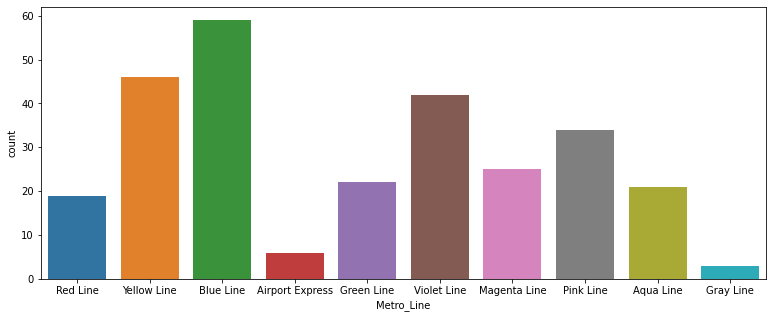

In [47]:
# Visualizing Metro Lines of all the Metro Stations

plt.rcParams["figure.figsize"]=13,5

sns.countplot(Geocoded_stations.Metro_Line)

In [48]:
Geocoded = Geocoded_stations.copy()

In [65]:
def radius_limit(df,datacolumn):
    datacolumn = df[datacolumn]
    datacolumn = sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.2 * IQR)
    upper_range = Q3 + (1.2 * IQR)
    return lower_range,upper_range

In [66]:
ll,uu = radius_limit(Geocoded,"longitude")
l,u = radius_limit(Geocoded,"latitude")

#Keeping Locations limited to Delhi Zone only Delhi
Geocoded.drop(Geocoded[ (Geocoded.latitude > u) | (Geocoded.latitude < l) ].index , inplace=True) 
Geocoded.drop(Geocoded[ (Geocoded.longitude > uu) | (Geocoded.longitude < ll) ].index , inplace=True)

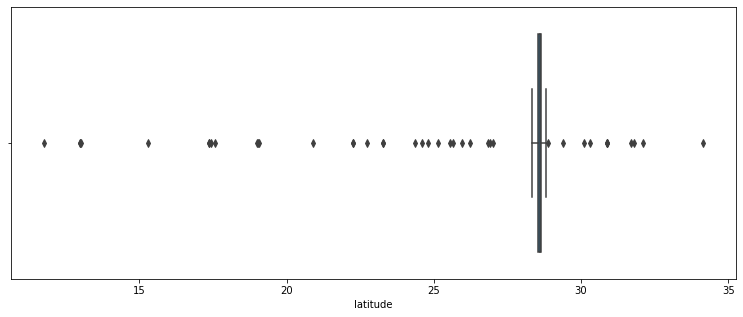

In [67]:
sns.boxplot(Geocoded_stations.latitude)

In [68]:
address = 'New Delhi, India'
# Getting the coordinates of Gurgaon address = 'Gurgaon, India'
geolocator = Nominatim(user_agent="locator")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Delhi, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Delhi, India 28.6138954, 77.2090057.


In [69]:
Dot_map = folium.Map(
    location=[28.6138954, 77.2090057],
    tiles='CartoDB dark_matter',
    zoom_start=12,
)
Geocoded.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(Dot_map), axis=1)

0      <folium.vector_layers.CircleMarker object at 0...
1      <folium.vector_layers.CircleMarker object at 0...
2      <folium.vector_layers.CircleMarker object at 0...
3      <folium.vector_layers.CircleMarker object at 0...
4      <folium.vector_layers.CircleMarker object at 0...
                             ...                        
264    <folium.vector_layers.CircleMarker object at 0...
265    <folium.vector_layers.CircleMarker object at 0...
266    <folium.vector_layers.CircleMarker object at 0...
267    <folium.vector_layers.CircleMarker object at 0...
276    <folium.vector_layers.CircleMarker object at 0...
Length: 220, dtype: object

In [70]:
Dot_map

In [71]:
map_kl = folium.Map(location=[28.6138954, 77.2090057], zoom_start=11)# Adding markers to map

for lat, lng, neighborhood , l in zip(Geocoded['latitude'],  Geocoded['longitude']
                                      , Geocoded['Station'], Geocoded['Metro_Line']):
    label = '{}'.format(neighborhood+l)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=5,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.5).add_to(map_kl)

In [72]:
map_kl

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'Cafe' category, but only those that are proper Self Serving Cafeteria's - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'Cafe' in category name, and we'll make sure to detect and include all the subcategories of specific 'Csfeteria' category, as we need info on Cafeteria's in the neighborhood of each Metro Station.

In [73]:
CLIENT_ID = "0TZMZVY0IBGJVKX1REGPJUXSMK1DL5IN5DKLVRFX4IIB5RR4" # your Foursquare ID
CLIENT_SECRET = "RWYZ5LQSOGHCYSLIALWMGHF5WXCFTLKHGJEWO1T5RFJV5HFZ" # your Foursquare Secret

VERSION = '20180606'
LIMIT = 150



def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)


In [74]:
Geocoded_stations

Station  longitude   latitude  sequence_number  \
0    Shaheed Sthal(New Bus Adda)  77.415809  28.670529               13   
1                   Hindon River  77.406537  28.673429               14   
2                        Arthala  77.391892  28.676999               15   
3                    Mohan Nagar  77.106082  28.606319               16   
4                     Shyam park  77.268464  28.698807               17   
..                           ...        ...        ...              ...   
272                 GNIDA Office  77.536518  28.484645              321   
273          Depot Greater Noida  77.513765  28.467073              322   
274                       Dwarka  68.974245  22.247101              323   
275                       Nangli  74.887276  31.686144              324   
276                    Najafgarh  76.982391  28.612304              325   

    Metro_Line  
0     Red Line  
1     Red Line  
2     Red Line  
3     Red Line  
4     Red Line  
..         ...  
272  Aqua Line  
273  Aqua Line  
274  Gray Line  
275  Gray Line  
276  Gray Line  

[277 rows x 5 columns]

In [299]:
Delhi_metro_venues = getNearbyVenues(Geocoded.Station, Geocoded.Metro_Line, Geocoded.latitude, 
                                     Geocoded.longitude, radius=500)

Fetching venues for :  Shaheed Sthal(New Bus Adda)
Fetching venues for :  Hindon River
Fetching venues for :  Arthala
Fetching venues for :  Mohan Nagar
Fetching venues for :  Shyam park
Fetching venues for :  Kashmere Gate
Fetching venues for :  Tis Hazari
Fetching venues for :  Pul Bangash
Fetching venues for :  Pratap Nagar
Fetching venues for :  Shastri Nagar
Fetching venues for :  Inderlok
Fetching venues for :  Kanhaiya Nagar
Fetching venues for :  Keshav Puram
Fetching venues for :  Kohat Enclave
Fetching venues for :  Pitam Pura
Fetching venues for :  Rohini East
Fetching venues for :  Rohini West
Fetching venues for :  Rithala
Fetching venues for :  Samaypur Badli
Fetching venues for :  Rohini Sector 18-19
Fetching venues for :  Haiderpur Badli Mor
Fetching venues for :  Jahangirpuri
Fetching venues for :  Azadpur
Fetching venues for :  Model Town
Fetching venues for :  Civil Lines
Fetching venues for :  Kashmere Gate
Fetching venues for :  Chandni Chowk
Fetching venues for : 

In [300]:
Delhi_metro_venues.columns = [ "Neighborhood" , "Metro_Line" ,"Neighborhood_Latitude",
"Neighborhood_Longitude" ,"Venue","Venue_Latitude" ,"Venue_Longitude" ,"Venue_Category"]

In [301]:
Delhi_metro_venues

Neighborhood Metro_Line  Neighborhood_Latitude  \
0     Shaheed Sthal(New Bus Adda)   Red Line              28.670529   
1     Shaheed Sthal(New Bus Adda)   Red Line              28.670529   
2     Shaheed Sthal(New Bus Adda)   Red Line              28.670529   
3                    Hindon River   Red Line              28.673429   
4                    Hindon River   Red Line              28.673429   
...                           ...        ...                    ...   
1574                    Najafgarh  Gray Line              28.612304   
1575                    Najafgarh  Gray Line              28.612304   
1576                    Najafgarh  Gray Line              28.612304   
1577                    Najafgarh  Gray Line              28.612304   
1578                    Najafgarh  Gray Line              28.612304   

      Neighborhood_Longitude                    Venue  Venue_Latitude  \
0                  77.415809  Ghaziabad New Bus Stand       28.668896   
1                  77.415809                Floralbay       28.670859   
2                  77.415809             Mohan makins       28.668894   
3                  77.406537            Axis Bank ATM       28.673000   
4                  77.406537            Agresen Chowk       28.674032   
...                      ...                      ...             ...   
1574               76.982391                HDFC Bank       28.610185   
1575               76.982391            Axis Bank ATM       28.609630   
1576               76.982391            Axis Bank ATM       28.611666   
1577               76.982391            Axis Bank ATM       28.608890   
1578               76.982391        First Choice Food       28.614778   

      Venue_Longitude     Venue_Category  
0           77.413315        Bus Station  
1           77.412479          Gift Shop  
2           77.418897            Brewery  
3           77.407220                ATM  
4           77.402234      Moving Target  
...               ...                ...  
1574        76.981458               Bank  
1575        76.981030                ATM  
1576        76.978676                ATM  
1577        76.982340                ATM  
1578        76.985149  Food & Drink Shop  

[1579 rows x 8 columns]

In [302]:
lll,uuu = radius_limit(Delhi_metro_venues,"Neighborhood_Longitude")
llll,uuuu = radius_limit(Delhi_metro_venues,"Neighborhood_Latitude")

#Keeping Locations limited to Delhi Zone only Delhi
Delhi_metro_venues.drop(Delhi_metro_venues[ (Delhi_metro_venues.Neighborhood_Latitude > uuuu) | (Delhi_metro_venues.Neighborhood_Latitude < llll) ].index , inplace=True) 
Delhi_metro_venues.drop(Delhi_metro_venues[ (Delhi_metro_venues.Neighborhood_Longitude > uuu) | (Delhi_metro_venues.Neighborhood_Longitude < lll) ].index , inplace=True)

In [303]:
Delhi_metro_venues.shape

(1509, 8)

In [304]:
Delhi_metro_venues.to_csv("Delhi_metro_station_venues.csv")

Looking good. So now we have all the venues in area within 500 meters from each Metro Station in DMRC, and we know which ones are having Cafeteria's! We also know which Cafe/restaurants exactly are in vicinity of every Metro Station.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Cafeteria!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas along Delhi Metro Network that have low restaurant density, particularly those with low number of self serving Cafeteria's. We will limit our analysis to area ~500m around each Metro Station in DMRC network.

In first step we have collected the required **data: location and type (category) of every venue within 500m from each Metro Station center** . We have also **identified all the existing Cafeteria's** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**Cafeteria density**' across different Metro Stations of DMRC network - we will use **folium map visualizations** to identify a few promising areas close to Metro Stations with low number of Cafeteria's in general (*and* no Self Serving Cafeteria in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **all the Venues/Restaurants in radius of 500 meters**, and we want locations **without much Cafe's in radius of 500 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of self serving restaurants/cafeteria's in every area candidate**:

In [305]:
Delhi_metro_venues.groupby('Venue_Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue_Category
Indian Restaurant       166
Café                     79
Hotel                    77
Coffee Shop              60
Fast Food Restaurant     57
Pizza Place              53
Light Rail Station       48
Chinese Restaurant       38
Bar                      33
Bakery                   30
Name: Neighborhood, dtype: int64

In [306]:
print("Total number of unique categories in Delhi Metro Network are : ",len(Delhi_metro_venues['Venue_Category'].unique()))

Total number of unique categories in Delhi Metro Network are :  193


In [307]:
individual_Delhi_venue_count = Delhi_metro_venues.groupby(['Metro_Line','Neighborhood'])['Metro_Line'].count().to_frame()

In [308]:
pd.set_option('display.max_rows', 250) 

In [309]:
individual_Delhi_venue_count.columns = ["Number_of_Venues"]

In [310]:
individual_Delhi_venue_count

Number_of_Venues
Metro_Line      Neighborhood                                    
Airport Express Delhi Aerocity                                23
                Dhaula Kuan                                    4
                Dwarka Sector 21                               4
                Gurdwara Bangla Sahib                          4
                IGI Airport                                   34
                Shivaji Stadium                               46
Blue Line       Akshardham                                     4
                Anand Vihar                                    4
                Barakhamba                                    16
                Botanical Garden                               9
                Dwarka Mor                                     5
                Dwarka Sector 10                               9
                Dwarka Sector 11                               1
                Dwarka Sector 12                               4
                Dwarka Sector 13                              13
                Dwarka Sector 14                               3
                Dwarka Sector 21                               4
                Dwarka Sector 8                                3
                Dwarka Sector 9                                4
                Jhandewalan                                    5
                Karol Bagh                                     5
                Kirti Nagar                                    2
                Laxmi Nagar                                    6
                Mandi House                                   15
                Moti Nagar                                    11
                New Ashok Nagar                                7
                Nirman Vihar                                  16
                Noida City Center                              8
                Noida Sector 15                                7
                Noida Sector 16                               11
                Noida Sector 18                               39
                Preet Vihar                                    9
                R K Ashram Marg                               16
                Rajendra Place                                11
                Rajghat                                        1
                Rajiv Chowk                                   66
                Rajouri Garden                                12
                Ramesh Nagar                                   6
                Shadipur                                       6
                Subhash Nagar                                 22
                Tagore Garden                                 13
                Uttam Nagar East                               5
                Uttam Nagar West                               4
                Yamuna Bank                                    2
Green Line      Ashok Park Main                                2
                Brigadier Hoshiar Singh                        5
                Inderlok                                       4
                Kirti Nagar                                    2
                Madipur                                        1
                Mundka                                         3
                Nangloi                                        4
                Nangloi Railway Station                        4
                National Museum                                4
                Paschim Vihar (East)                           4
                Paschim Vihar (West)                           5
                Peera Garhi                                    4
                Punjabi Bagh                                   8
                Rajdhani Park                                  2
                Satguru Ram Singh Marg                         3
                Shivaji Park                                   2
                Ud

In [311]:
individual_Delhi_venue_count.reset_index(inplace=True)

In [312]:
individual_Delhi_venue_count

Metro_Line                    Neighborhood  Number_of_Venues
0    Airport Express                  Delhi Aerocity                23
1    Airport Express                     Dhaula Kuan                 4
2    Airport Express                Dwarka Sector 21                 4
3    Airport Express           Gurdwara Bangla Sahib                 4
4    Airport Express                     IGI Airport                34
5    Airport Express                 Shivaji Stadium                46
6          Blue Line                      Akshardham                 4
7          Blue Line                     Anand Vihar                 4
8          Blue Line                      Barakhamba                16
9          Blue Line                Botanical Garden                 9
10         Blue Line                      Dwarka Mor                 5
11         Blue Line                Dwarka Sector 10                 9
12         Blue Line                Dwarka Sector 11                 1
13         Blue Line                Dwarka Sector 12                 4
14         Blue Line                Dwarka Sector 13                13
15         Blue Line                Dwarka Sector 14                 3
16         Blue Line                Dwarka Sector 21                 4
17         Blue Line                 Dwarka Sector 8                 3
18         Blue Line                 Dwarka Sector 9                 4
19         Blue Line                     Jhandewalan                 5
20         Blue Line                      Karol Bagh                 5
21         Blue Line                     Kirti Nagar                 2
22         Blue Line                     Laxmi Nagar                 6
23         Blue Line                     Mandi House                15
24         Blue Line                      Moti Nagar                11
25         Blue Line                 New Ashok Nagar                 7
26         Blue Line                    Nirman Vihar                16
27         Blue Line               Noida City Center                 8
28         Blue Line                 Noida Sector 15                 7
29         Blue Line                 Noida Sector 16                11
30         Blue Line                 Noida Sector 18                39
31         Blue Line                     Preet Vihar                 9
32         Blue Line                 R K Ashram Marg                16
33         Blue Line                  Rajendra Place                11
34         Blue Line                         Rajghat                 1
35         Blue Line                     Rajiv Chowk                66
36         Blue Line                  Rajouri Garden                12
37         Blue Line                    Ramesh Nagar                 6
38         Blue Line                        Shadipur                 6
39         Blue Line                   Subhash Nagar                22
40         Blue Line                   Tagore Garden                13
41         Blue Line                Uttam Nagar East                 5
42         Blue Line                Uttam Nagar West                 4
43         Blue Line                     Yamuna Bank                 2
44        Green Line                 Ashok Park Main                 2
45        Green Line         Brigadier Hoshiar Singh                 5
46        Green Line                        Inderlok                 4
47        Green Line                     Kirti Nagar                 2
48        Green Line                         Madipur                 1
49        Green Line                          Mundka                 3
50        Green Line                         Nangloi                 4
51        Green Line         Nangloi Railway Station                 4
52        Green Line                 National Museum                 4
53        Green Line            Paschim Vihar (East)                 4
54        Green Line            Paschim Vihar (West)                 5
55        Green Line              

[Text(0, 0, 'Delhi Aerocity'),
 Text(0, 0, 'Dhaula Kuan'),
 Text(0, 0, 'Dwarka Sector 21'),
 Text(0, 0, 'Gurdwara Bangla Sahib'),
 Text(0, 0, 'IGI Airport'),
 Text(0, 0, 'Shivaji Stadium'),
 Text(0, 0, 'Akshardham'),
 Text(0, 0, 'Anand Vihar'),
 Text(0, 0, 'Barakhamba'),
 Text(0, 0, 'Botanical Garden'),
 Text(0, 0, 'Dwarka Mor'),
 Text(0, 0, 'Dwarka Sector 10'),
 Text(0, 0, 'Dwarka Sector 11'),
 Text(0, 0, 'Dwarka Sector 12'),
 Text(0, 0, 'Dwarka Sector 13'),
 Text(0, 0, 'Dwarka Sector 14'),
 Text(0, 0, 'Dwarka Sector 21'),
 Text(0, 0, 'Dwarka Sector 8'),
 Text(0, 0, 'Dwarka Sector 9'),
 Text(0, 0, 'Jhandewalan'),
 Text(0, 0, 'Karol Bagh'),
 Text(0, 0, 'Kirti Nagar'),
 Text(0, 0, 'Laxmi Nagar'),
 Text(0, 0, 'Mandi House'),
 Text(0, 0, 'Moti Nagar'),
 Text(0, 0, 'New Ashok Nagar'),
 Text(0, 0, 'Nirman Vihar'),
 Text(0, 0, 'Noida City Center'),
 Text(0, 0, 'Noida Sector 15'),
 Text(0, 0, 'Noida Sector 16'),
 Text(0, 0, 'Noida Sector 18'),
 Text(0, 0, 'Preet Vihar'),
 Text(0, 0, 'R K Ashr

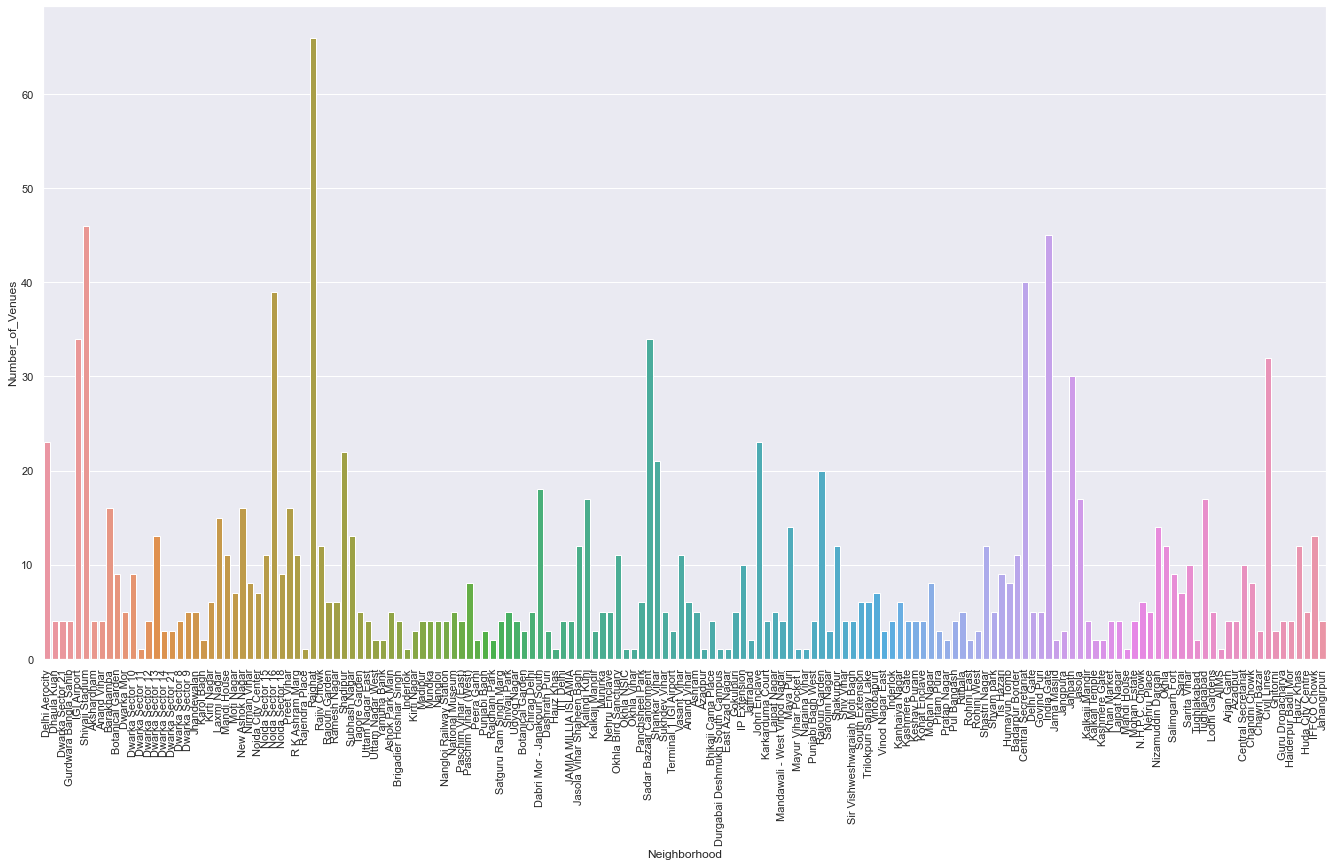

In [313]:
sns.set(rc={'figure.figsize':(23,12)})

plot = sns.barplot(x='Neighborhood',y='Number_of_Venues',data=individual_Delhi_venue_count)
plot.set_xticklabels(individual_Delhi_venue_count['Neighborhood'],rotation=90)

In [314]:
Delhi_venues_onehot = pd.get_dummies(Delhi_metro_venues[['Venue_Category']])

In [315]:
Delhi_venues_onehot

Venue_Category_ATM  Venue_Category_Accessories Store  \
10                     0                                 0   
11                     0                                 0   
12                     0                                 0   
13                     0                                 0   
14                     1                                 0   
...                  ...                               ...   
1553                   0                                 0   
1554                   0                                 0   
1555                   1                                 0   
1556                   0                                 0   
1557                   0                                 0   

      Venue_Category_Afghan Restaurant  Venue_Category_Airport  \
10                                   0                       0   
11                                   0                       0   
12                                   0                       0   
13                                   0                       0   
14                                   0                       0   
...                                ...                     ...   
1553                                 0                       0   
1554                                 0                       0   
1555                                 0                       0   
1556                                 0                       0   
1557                                 0                       0   

      Venue_Category_Airport Food Court  Venue_Category_Airport Lounge  \
10                                    0                              0   
11                                    0                              0   
12                                    0                              0   
13                                    0                              0   
14                                    0                              0   
...                                 ...                            ...   
1553                                  0                              0   
1554                                  0                              0   
1555                                  0                              0   
1556                                  0                              0   
1557                                  0                              0   

      Venue_Category_Airport Service  Venue_Category_American Restaurant  \
10                                 0                                   0   
11                                 0                                   0   
12                                 0                                   0   
13                                 0                                   0   
14                                 0                                   0   
...                              ...                                 ...   
1553                               0                                   0   
1554                               0                                   0   
1555                               0                                   0   
1556                               0                                   0   
1557                               0                                   0   

      Venue_Category_Antique Shop  Venue_Category_Arcade  ...  \
10                              0                      0  ...   
11                              0                      0  ...   
12                              0                      0  ...   
13                              0                      0  ...   
14                              0                      0  ...   
...                           ...                    ...  ...   
1553                            0                      0  ...   
1554                            0                      0  ...   
1555                            0                      0  ...   
1556            

In [316]:
Delhi_venues_onehot['Neighborhood'] = Delhi_metro_venues['Neighborhood']

Delhi_venues_grouped = Delhi_venues_onehot.groupby('Neighborhood').mean().reset_index()

In [317]:
Delhi_venues_grouped

Neighborhood  Venue_Category_ATM  \
0                      Humayun Tomb            0.000000   
1                     Lodhi Gardens            0.000000   
2                             AIIMS            0.000000   
3                        Akshardham            0.000000   
4                       Anand Vihar            0.000000   
5                        Arjan Garh            0.000000   
6                   Ashok Park Main            0.000000   
7                            Ashram            0.000000   
8                           Azadpur            0.000000   
9                   Badarpur Border            0.000000   
10                       Barakhamba            0.000000   
11               Bhikaji Cama Place            0.000000   
12                 Botanical Garden            0.000000   
13          Brigadier Hoshiar Singh            0.000000   
14              Central Secretariat            0.000000   
15                    Chandni Chowk            0.000000   
16                     Chawri Bazar            0.000000   
17                     Chirag Delhi            0.000000   
18                      Civil Lines            0.000000   
19      Dabri Mor - Janakpuri South            0.000000   
20                    Dashrath Puri            0.333333   
21                   Delhi Aerocity            0.000000   
22                       Delhi Gate            0.000000   
23                      Dhaula Kuan            0.000000   
24   Durgabai Deshmukh South Campus            0.000000   
25                       Dwarka Mor            0.200000   
26                 Dwarka Sector 10            0.000000   
27                 Dwarka Sector 11            0.000000   
28                 Dwarka Sector 12            0.000000   
29                 Dwarka Sector 13            0.000000   
30                 Dwarka Sector 14            0.000000   
31                 Dwarka Sector 21            0.000000   
32                  Dwarka Sector 8            0.000000   
33                  Dwarka Sector 9            0.000000   
34                  East Azad Nagar            0.000000   
35                         Ghitorni            0.000000   
36                        Gokulpuri            0.000000   
37                      Govind Puri            0.000000   
38            Gurdwara Bangla Sahib            0.000000   
39                 Guru Dronacharya            0.000000   
40              Haiderpur Badli Mor            0.000000   
41                        Hauz Khas            0.000000   
42                 Huda City Centre            0.000000   
43                      IFFCO Chowk            0.000000   
44                      IGI Airport            0.000000   
45                        IIT Delhi            0.000000   
46                     IP Extension            0.000000   
47                         Inderlok            0.000000   
48                       India Gate            0.000000   
49             JAMIA MILLIA ISLAMIA            0.000000   
50                        Jaffrabad            0.000000   
51                     Jahangirpuri            0.000000   
52                      Jama Masjid            0.000000   
53                         Jangpura            0.000000   
54                          Janpath            0.000000   
55                           Jasola            0.000000   
56        Jasola Vihar Shaheen Bagh            0.000000   
57                      Jhandewalan            0.000000   
58                    Johri Enclave            1.000000   
59                     Kalindi Kunj            0.000000   
60                   Kalkaji Mandir            0.000000   
61                   Kalkaji Temple            0.000000   
62                   Kanhaiya Nagar            0.000000   
63                 Karkarduma Court            0.000000   
64                       Karol Bagh            0.000000   
65                    Kashmere Gate            0.000000   
66                     Keshav Puram            0.000000   
67         

In [318]:
number_of_top_venues = 5  #Keeping top 5 nearby venues

In [319]:
for station in Delhi_venues_grouped['Neighborhood']:
    print('---------',station,'---------')
    temp = Delhi_venues_grouped[Delhi_venues_grouped['Neighborhood'] == station].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

---------  Humayun Tomb ---------
                                Venue  Frequency
0                 Venue_Category_Café        0.2
1               Venue_Category_Garden        0.2
2           Venue_Category_Food Court        0.2
3        Venue_Category_Historic Site        0.2
4  Venue_Category_Monument / Landmark        0.2


---------  Lodhi Gardens ---------
                           Venue  Frequency
0  Venue_Category_Boarding House       0.25
1            Venue_Category_Park       0.25
2  Venue_Category_History Museum       0.25
3             Venue_Category_Spa       0.25
4          Venue_Category_Museum       0.00


--------- AIIMS ---------
                               Venue  Frequency
0           Venue_Category_Bookstore       0.17
1         Venue_Category_Snack Place       0.17
2  Venue_Category_Airport Food Court       0.17
3       Venue_Category_Jewelry Store       0.17
4  Venue_Category_Light Rail Station       0.17


--------- Akshardham ---------
                      

                                 Venue  Frequency
0                   Venue_Category_Gym        0.4
1       Venue_Category_Motorcycle Shop        0.2
2           Venue_Category_Men's Store        0.2
3  Venue_Category_Fast Food Restaurant        0.2
4                   Venue_Category_ATM        0.0


--------- Ghitorni ---------
                              Venue  Frequency
0               Venue_Category_Lake       0.14
1  Venue_Category_Indian Restaurant       0.14
2              Venue_Category_Hotel       0.14
3        Venue_Category_Pizza Place       0.14
4     Venue_Category_Sandwich Place       0.14


--------- Gokulpuri ---------
                                Venue  Frequency
0          Venue_Category_Pizza Place        1.0
1                  Venue_Category_ATM        0.0
2          Venue_Category_Music Venue        0.0
3  Venue_Category_Monument / Landmark        0.0
4               Venue_Category_Mosque        0.0


--------- Govind Puri ---------
                           

                               Venue  Frequency
0         Venue_Category_Snack Place       0.17
1       Venue_Category_Train Station       0.17
2  Venue_Category_Light Rail Station       0.17
3                 Venue_Category_Gym       0.17
4       Venue_Category_Shopping Mall       0.17


--------- Lodhi Gardens ---------
                           Venue  Frequency
0  Venue_Category_Boarding House       0.25
1            Venue_Category_Park       0.25
2  Venue_Category_History Museum       0.25
3             Venue_Category_Spa       0.25
4          Venue_Category_Museum       0.00


--------- Lok Kalyan Marg ---------
                           Venue  Frequency
0            Venue_Category_Food       0.25
1  Venue_Category_History Museum       0.25
2       Venue_Category_Racetrack       0.25
3     Venue_Category_Bus Station       0.25
4             Venue_Category_ATM       0.00


--------- Madipur ---------
                                Venue  Frequency
0        Venue_Category_Train S

4                   Venue_Category_ATM       0.00


--------- Paschim Vihar (West) ---------
                                Venue  Frequency
0                  Venue_Category_Gym        0.2
1        Venue_Category_Train Station        0.2
2  Venue_Category_Sporting Goods Shop        0.2
3                  Venue_Category_Bar        0.2
4               Venue_Category_Bakery        0.2


--------- Peera Garhi ---------
                              Venue  Frequency
0      Venue_Category_Train Station       0.50
1          Venue_Category_Hotel Bar       0.25
2  Venue_Category_Indian Restaurant       0.25
3                Venue_Category_ATM       0.00
4        Venue_Category_Music Venue       0.00


--------- Pitam Pura ---------
                              Venue  Frequency
0     Venue_Category_Ice Cream Shop       0.25
1      Venue_Category_Metro Station       0.25
2                Venue_Category_Gym       0.25
3  Venue_Category_Indian Restaurant       0.25
4        Venue_Category_Pizza

                                            Venue  Frequency
0                 Venue_Category_Business Service        1.0
1  Venue_Category_Molecular Gastronomy Restaurant        0.0
2                           Venue_Category_Mosque        0.0
3                            Venue_Category_Motel        0.0
4                  Venue_Category_Motorcycle Shop        0.0


--------- Shivaji Park ---------
                                Venue  Frequency
0          Venue_Category_Pizza Place        0.5
1        Venue_Category_Train Station        0.5
2          Venue_Category_Music Venue        0.0
3  Venue_Category_Monument / Landmark        0.0
4               Venue_Category_Mosque        0.0


--------- Shivaji Stadium ---------
                               Venue  Frequency
0   Venue_Category_Indian Restaurant       0.13
1  Venue_Category_Chinese Restaurant       0.11
2                Venue_Category_Café       0.11
3         Venue_Category_Coffee Shop       0.07
4                 Venue_Cat

In [320]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [321]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Delhi_venues_grouped['Neighborhood']

for ind in np.arange(Delhi_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Delhi_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood               1st Most Common Venue  \
0    Humayun Tomb  Venue_Category_Monument / Landmark   
1   Lodhi Gardens       Venue_Category_Boarding House   
2           AIIMS        Venue_Category_Jewelry Store   
3      Akshardham         Venue_Category_Hindu Temple   
4     Anand Vihar          Venue_Category_Pizza Place   

               2nd Most Common Venue         3rd Most Common Venue  \
0       Venue_Category_Historic Site         Venue_Category_Garden   
1      Venue_Category_History Museum           Venue_Category_Park   
2  Venue_Category_Airport Food Court    Venue_Category_Snack Place   
3  Venue_Category_Athletics & Sports    Venue_Category_Yoga Studio   
4          Venue_Category_Shoe Store  Venue_Category_Movie Theater   

               4th Most Common Venue             5th Most Common Venue  \
0                Venue_Category_Café         Venue_Category_Food Court   
1                 Venue_Category_Spa  Venue_Category_Electronics Store   
2  Venue_Category_Light Rail Station                Venue_Category_Gym   
3   Venue_Category_Electronics Store         Venue_Category_Food Court   
4               Venue_Category_Hotel       Venue_Category_Hindu Temple   

              6th Most Common Venue             7th Most Common Venue  \
0        Venue_Category_Yoga Studio  Venue_Category_Electronics Store   
1  Venue_Category_Food & Drink Shop               Venue_Category_Food   
2          Venue_Category_Bookstore              Venue_Category_Diner   
3  Venue_Category_Food & Drink Shop               Venue_Category_Food   
4     Venue_Category_Duty-free Shop        Venue_Category_Flea Market   

                 8th Most Common Venue                9th Most Common Venue  \
0                  Venue_Category_Food           Venue_Category_Flea Market   
1           Venue_Category_Flea Market  Venue_Category_Fast Food Restaurant   
2      Venue_Category_Department Store            Venue_Category_Food Court   
3           Venue_Category_Flea Market  Venue_Category_Fast Food Restaurant   
4  Venue_Category_Fast Food Restaurant        Venue_Category_Farmers Market   

                10th Most Common Venue  
0  Venue_Category_Fast Food Restaurant  
1        Venue_Category_Farmers Market  
2         Venue_Category_Deli / Bodega  
3        Venue_Category_Farmers Market  
4                  Venue_Category_Farm

Looking good. What we have now is a clear indication of zones with low number of nearby Cafeteria in vicinity, and *no* Cafeteria's at all nearby.

Let us now **cluster** those locations to create **centers of zones containing good locations**. Those zones, their centers and addresses will be the final result of our analysis. 

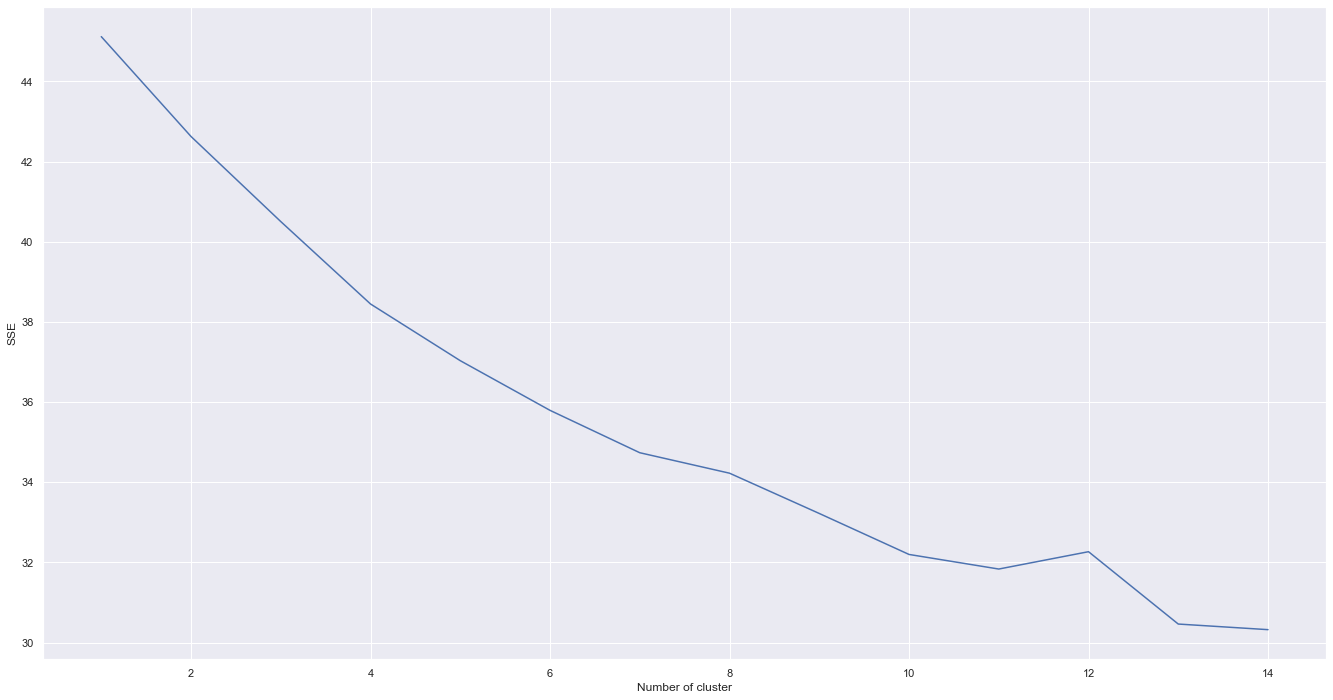

In [322]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(Delhi_venues_grouped.drop('Neighborhood',axis=1))
    Delhi_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [323]:
kmeans = KMeans(n_clusters=6,random_state=0)

In [324]:
kmeans.fit(Delhi_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [325]:
Delhi_venues_grouped['Cluster'] = kmeans.labels_

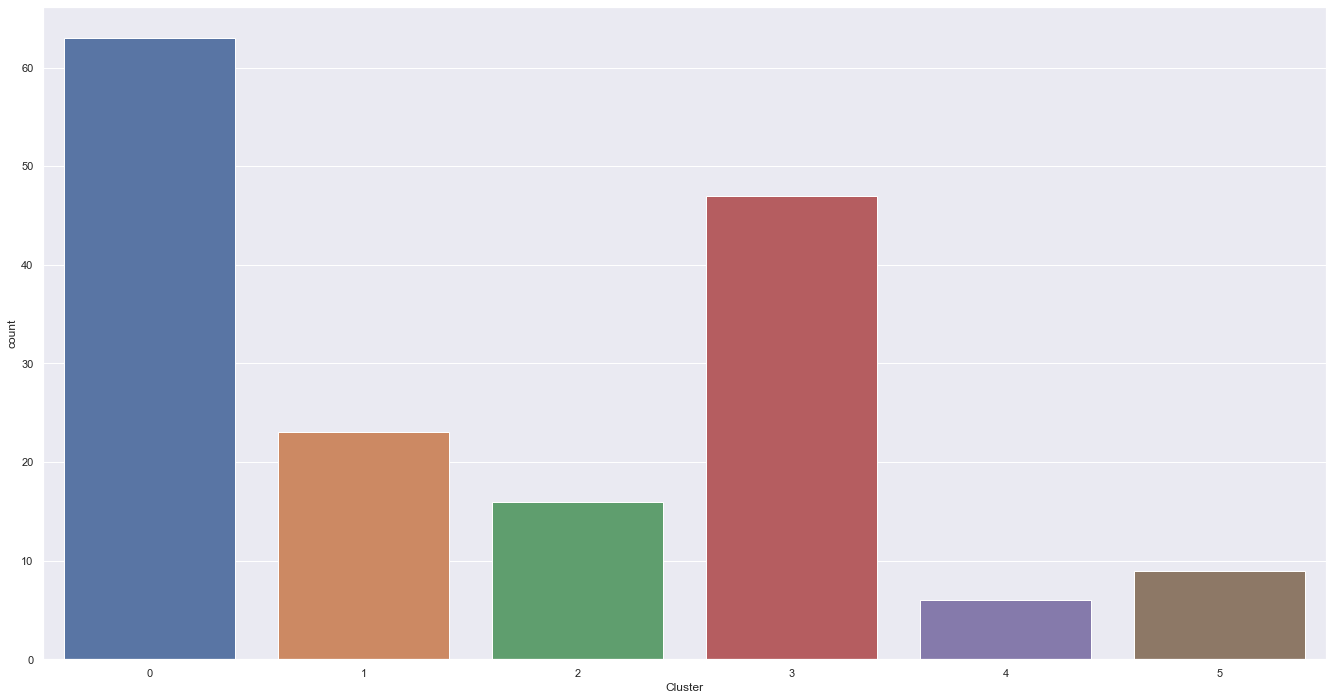

In [326]:
sns.countplot(Delhi_venues_grouped.Cluster)

In [327]:
Delhi_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    63
1    23
2    16
3    47
4     6
5     9
Name: Neighborhood, dtype: int64

In [328]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Delhi_venues_grouped,on='Neighborhood')

In [329]:
neighborhoods_venues_sorted

Neighborhood  \
0                      Humayun Tomb   
1                     Lodhi Gardens   
2                             AIIMS   
3                        Akshardham   
4                       Anand Vihar   
5                        Arjan Garh   
6                   Ashok Park Main   
7                            Ashram   
8                           Azadpur   
9                   Badarpur Border   
10                       Barakhamba   
11               Bhikaji Cama Place   
12                 Botanical Garden   
13          Brigadier Hoshiar Singh   
14              Central Secretariat   
15                    Chandni Chowk   
16                     Chawri Bazar   
17                     Chirag Delhi   
18                      Civil Lines   
19      Dabri Mor - Janakpuri South   
20                    Dashrath Puri   
21                   Delhi Aerocity   
22                       Delhi Gate   
23                      Dhaula Kuan   
24   Durgabai Deshmukh South Campus   
25                       Dwarka Mor   
26                 Dwarka Sector 10   
27                 Dwarka Sector 11   
28                 Dwarka Sector 12   
29                 Dwarka Sector 13   
30                 Dwarka Sector 14   
31                 Dwarka Sector 21   
32                  Dwarka Sector 8   
33                  Dwarka Sector 9   
34                  East Azad Nagar   
35                         Ghitorni   
36                        Gokulpuri   
37                      Govind Puri   
38            Gurdwara Bangla Sahib   
39                 Guru Dronacharya   
40              Haiderpur Badli Mor   
41                        Hauz Khas   
42                 Huda City Centre   
43                      IFFCO Chowk   
44                      IGI Airport   
45                        IIT Delhi   
46                     IP Extension   
47                         Inderlok   
48                       India Gate   
49             JAMIA MILLIA ISLAMIA   
50                        Jaffrabad   
51                     Jahangirpuri   
52                      Jama Masjid   
53                         Jangpura   
54                          Janpath   
55                           Jasola   
56        Jasola Vihar Shaheen Bagh   
57                      Jhandewalan   
58                    Johri Enclave   
59                     Kalindi Kunj   
60                   Kalkaji Mandir   
61                   Kalkaji Temple   
62                   Kanhaiya Nagar   
63                 Karkarduma Court   
64                       Karol Bagh   
65                    Kashmere Gate   
66                     Keshav Puram   
67                      Khan Market   
68                      Kirti Nagar   
69                    Kohat Enclave   
70                     Lajpat Nagar   
71                      Laxmi Nagar   
72                    Lodhi Gardens   
73                  Lok Kalyan Marg   
74                          Madipur   
75                    Malviya Nagar   
76     Mandawali - West Vinod Nagar   
77                      Mandi House   
78                        Maya Puri   
79             Mayur Vihar Pocket I   
80                       Model Town   
81                     Mohan Estate   
82                      Mohan Nagar   
83                       Moti Nagar   
84                           Mundka   
85                          Munirka   
86                   N.H.P.C. Chowk   
87                          Nangloi   
88          Nangloi Railway Station   
89                    Naraina Vihar   
90                  National Museum   
91                    Nehru Enclave   
92                      Nehru Place   
93                  New Ashok Nagar   
94                        New Delhi   
95                     Nirman Vihar   
96                Nizamuddin Dargah   
97                Noida City Center   
98                  Noida Sector 15   
99                  Noida Sector 16   
100                 Noida Sector 18   
101                           Okhla   
102   

In [330]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(Delhi_metro_venues,on='Neighborhood')

In [331]:
neighborhoods_venues_sorted

Neighborhood               1st Most Common Venue  \
0         Humayun Tomb  Venue_Category_Monument / Landmark   
1         Humayun Tomb  Venue_Category_Monument / Landmark   
2         Humayun Tomb  Venue_Category_Monument / Landmark   
3         Humayun Tomb  Venue_Category_Monument / Landmark   
4         Humayun Tomb  Venue_Category_Monument / Landmark   
...                ...                                 ...   
1504  Vinod Nagar East            Venue_Category_Juice Bar   
1505  Vinod Nagar East            Venue_Category_Juice Bar   
1506  Vinod Nagar East            Venue_Category_Juice Bar   
1507       Yamuna Bank          Venue_Category_Record Shop   
1508       Yamuna Bank          Venue_Category_Record Shop   

              2nd Most Common Venue  \
0      Venue_Category_Historic Site   
1      Venue_Category_Historic Site   
2      Venue_Category_Historic Site   
3      Venue_Category_Historic Site   
4      Venue_Category_Historic Site   
...                             ...   
1504  Venue_Category_Ice Cream Shop   
1505  Venue_Category_Ice Cream Shop   
1506  Venue_Category_Ice Cream Shop   
1507     Venue_Category_Yoga Studio   
1508     Venue_Category_Yoga Studio   

                           3rd Most Common Venue  \
0                          Venue_Category_Garden   
1                          Venue_Category_Garden   
2                          Venue_Category_Garden   
3                          Venue_Category_Garden   
4                          Venue_Category_Garden   
...                                          ...   
1504               Venue_Category_Sandwich Place   
1505               Venue_Category_Sandwich Place   
1506               Venue_Category_Sandwich Place   
1507  Venue_Category_Eastern European Restaurant   
1508  Venue_Category_Eastern European Restaurant   

                 4th Most Common Venue  \
0                  Venue_Category_Café   
1                  Venue_Category_Café   
2                  Venue_Category_Café   
3                  Venue_Category_Café   
4                  Venue_Category_Café   
...                                ...   
1504               Venue_Category_Café   
1505               Venue_Category_Café   
1506               Venue_Category_Café   
1507  Venue_Category_Food & Drink Shop   
1508  Venue_Category_Food & Drink Shop   

                           5th Most Common Venue  \
0                      Venue_Category_Food Court   
1                      Venue_Category_Food Court   
2                      Venue_Category_Food Court   
3                      Venue_Category_Food Court   
4                      Venue_Category_Food Court   
...                                          ...   
1504  Venue_Category_Eastern European Restaurant   
1505  Venue_Category_Eastern European Restaurant   
1506  Venue_Category_Eastern European Restaurant   
1507                         Venue_Category_Food   
1508                         Venue_Category_Food   

                 6th Most Common Venue                7th Most Common Venue  \
0           Venue_Category_Yoga Studio     Venue_Category_Electronics Store   
1           Venue_Category_Yoga Studio     Venue_Category_Electronics Store   
2           Venue_Category_Yoga Studio     Venue_Category_Electronics Store   
3           Venue_Category_Yoga Studio     Venue_Category_Electronics Store   
4           Venue_Category_Yoga Studio     Venue_Category_Electronics Store   
...                                ...                                  ...   
1504  Venue_Category_Food & Drink Shop                  Venue_Category_Food   
1505  Venue_Category_Food & Drink Shop                  Venue_Category_Food   
1506  Venue_Category_Food & Drink Shop                  Venue_Category_Food   
1507        Venue_Category_Flea Market  Venue_Category_Fast Food Restaurant   
1508        Venue_Category_Flea Market  Venue_Category_Fast Food Restaurant   

              8th Most Common Venue                9th Most Common Venue  ...  \
0          

In [332]:
# create map
map_clusters = folium.Map(location=[28.6138954, 77.2090057], zoom_start=11)

In [333]:
neighborhoods_venues_sorted.columns

Index(['Neighborhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue',
       ...
       'Venue_Category_Women's Store', 'Venue_Category_Yoga Studio', 'Cluster',
       'Metro_Line', 'Neighborhood_Latitude', 'Neighborhood_Longitude',
       'Venue', 'Venue_Latitude', 'Venue_Longitude', 'Venue_Category'],
      dtype='object', length=212)

In [334]:

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood_Latitude'], neighborhoods_venues_sorted['Neighborhood_Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [335]:
map_clusters

## Visualizing and Interpreting Neighbourhood Venues of each of the cluster

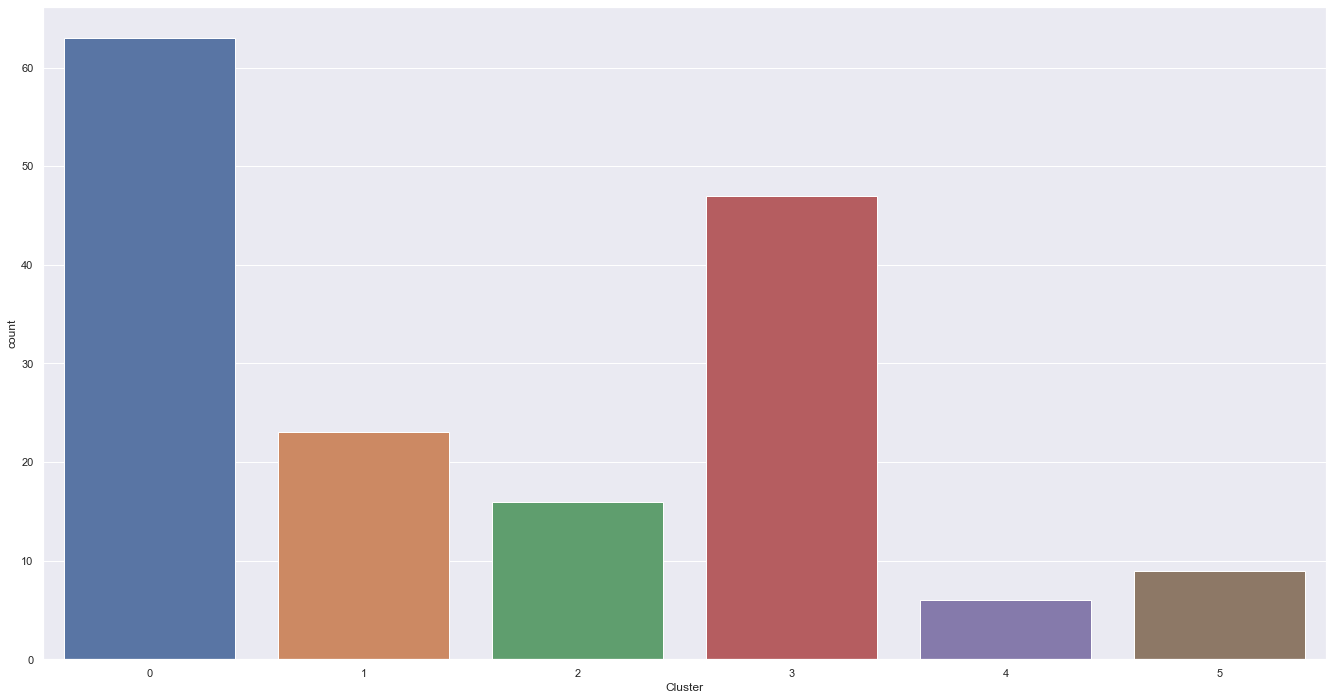

In [336]:
sns.countplot(Delhi_venues_grouped.Cluster)

Not bad - our clusters represent groupings of most of the candidate locations and cluster centers are placed nicely in the middle of the zones 'rich' with location candidates.

Addresses of those cluster centers will be a good starting point for exploring the neighborhoods to find the best possible location based on neighborhood specifics.

Let's see those zones on Python City Folium Maps, using coloured areas to indicate our clusters:

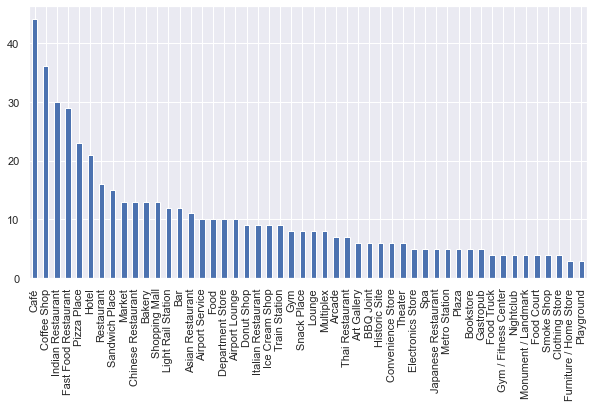

In [337]:
sns.set(rc={'figure.figsize':(10,5)})
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==0]["Venue_Category"].value_counts().head(50).plot(kind="bar")

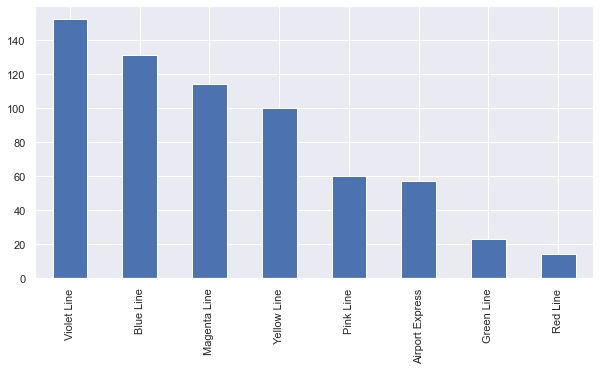

In [338]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==0]['Metro_Line'].value_counts().head(50).plot(kind="bar")

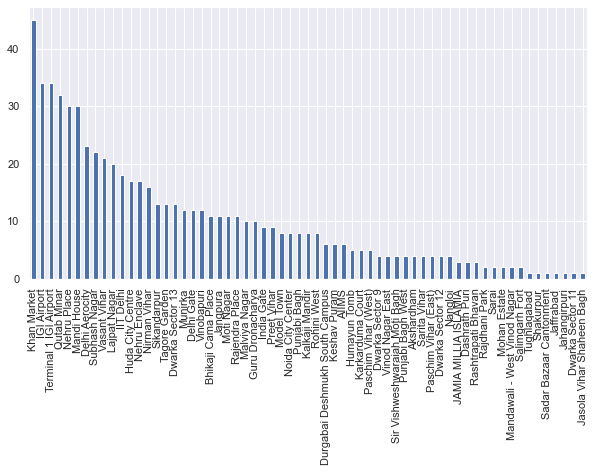

In [339]:
cluster_0 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==0]

cluster_0.Neighborhood.value_counts().plot(kind="bar")

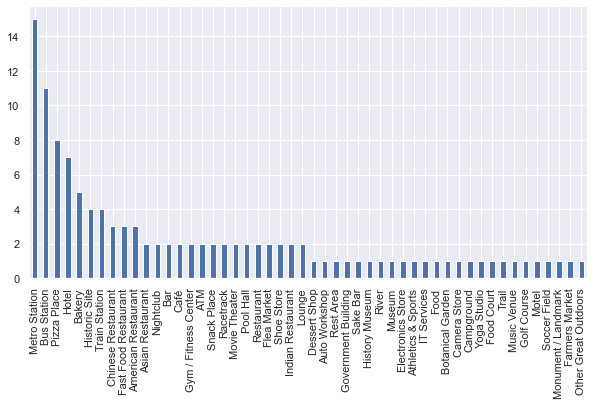

In [340]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==1]["Venue_Category"].value_counts().head(50).plot(kind="bar")

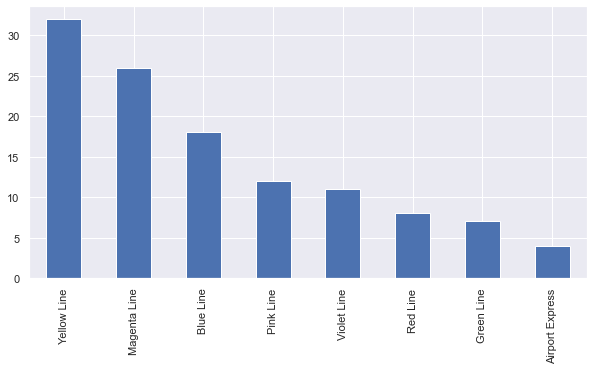

In [341]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==1]['Metro_Line'].value_counts().head(50).plot(kind="bar")

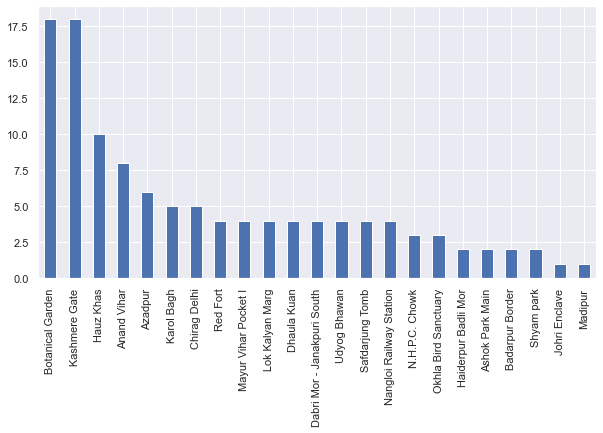

In [342]:
cluster_1 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==1]

cluster_1.Neighborhood.value_counts().plot(kind="bar")

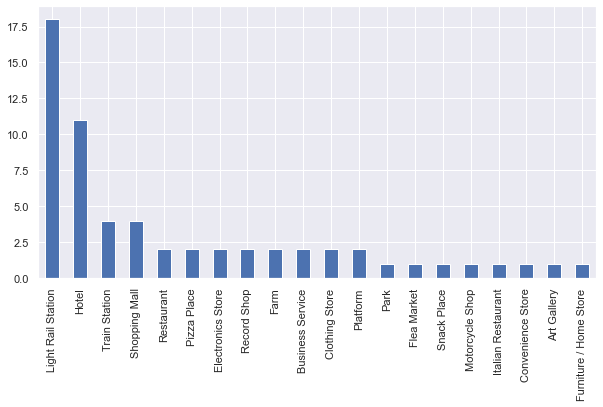

In [343]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==2]["Venue_Category"].value_counts().head(20).plot(kind="bar")

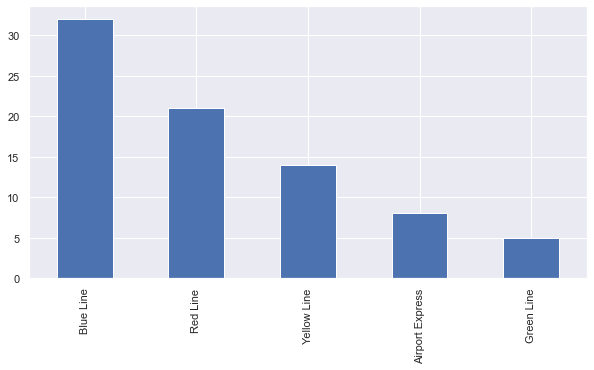

In [344]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==2]['Metro_Line'].value_counts().head(50).plot(kind="bar")

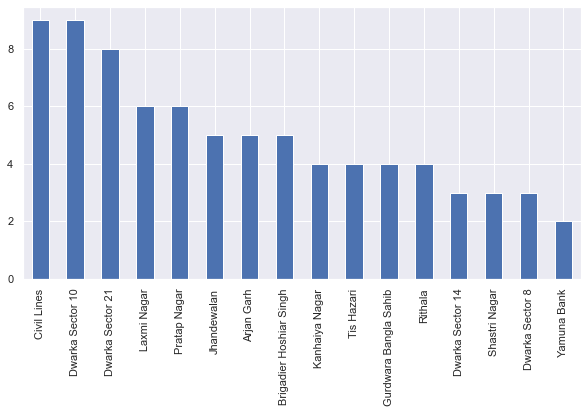

In [345]:
cluster_2 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==2]

cluster_2.Neighborhood.value_counts().plot(kind="bar")

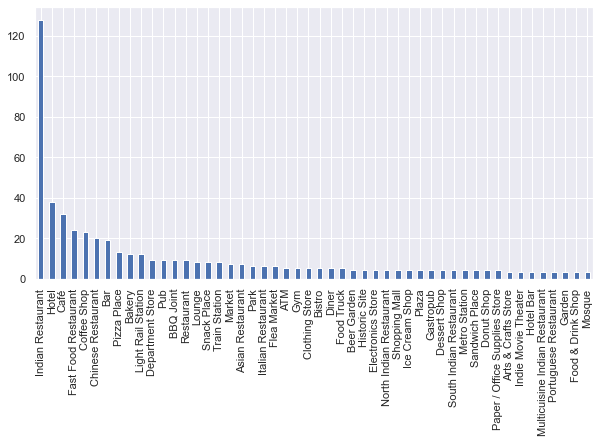

In [346]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==3]["Venue_Category"].value_counts().head(50).plot(kind="bar")

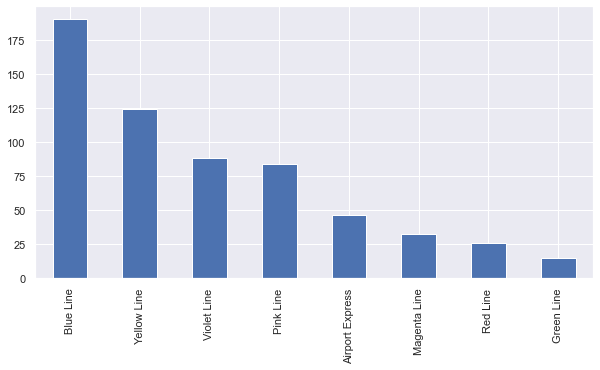

In [347]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==3]['Metro_Line'].value_counts().head(50).plot(kind="bar")

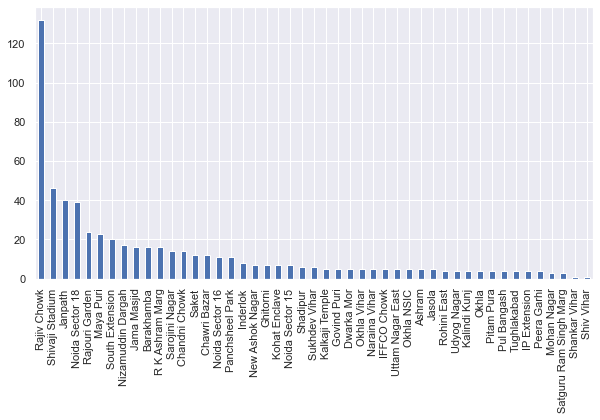

In [348]:
cluster_3 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==3]

cluster_3.Neighborhood.value_counts().plot(kind="bar")

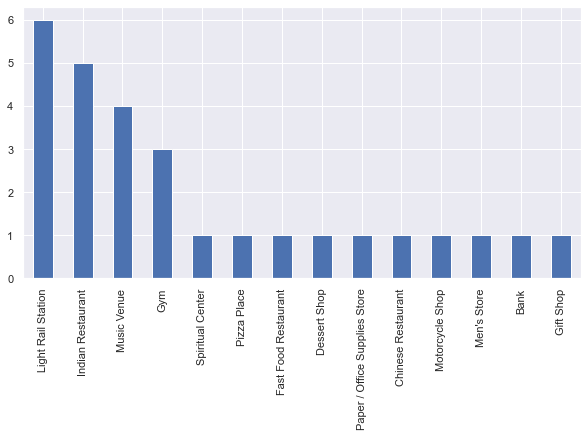

In [349]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==4]["Venue_Category"].value_counts().head(20).plot(kind="bar")

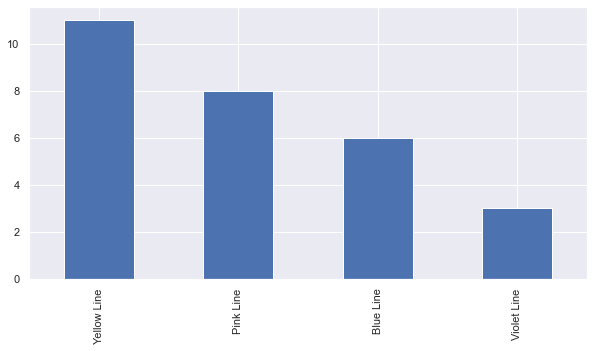

In [350]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==4]['Metro_Line'].value_counts().head(20).plot(kind="bar")

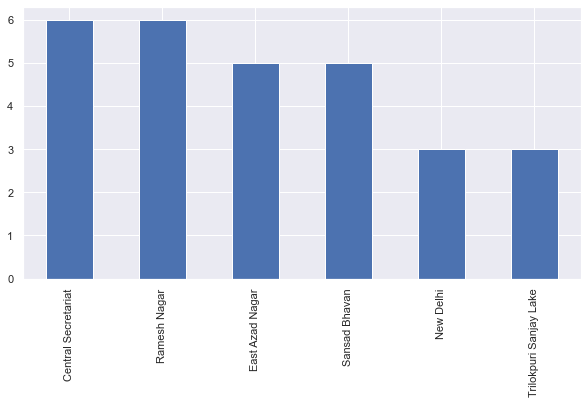

In [351]:
cluster_4 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==4]

cluster_4.Neighborhood.value_counts().plot(kind="bar")

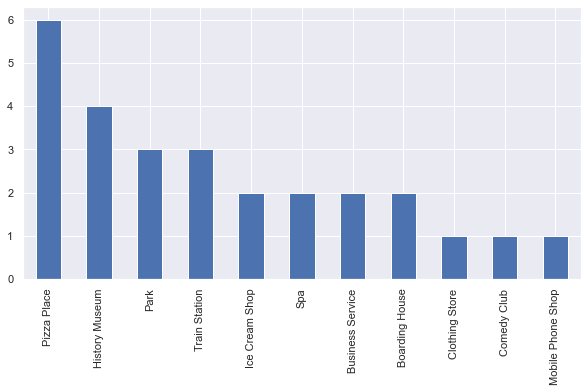

In [352]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==5]["Venue_Category"].value_counts().head(20).plot(kind="bar")

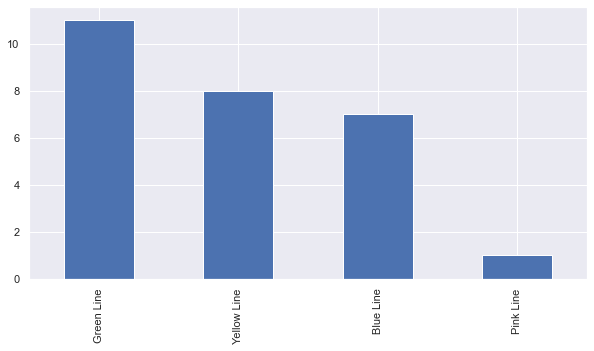

In [353]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Cluster"]==5]['Metro_Line'].value_counts().head(20).plot(kind="bar")

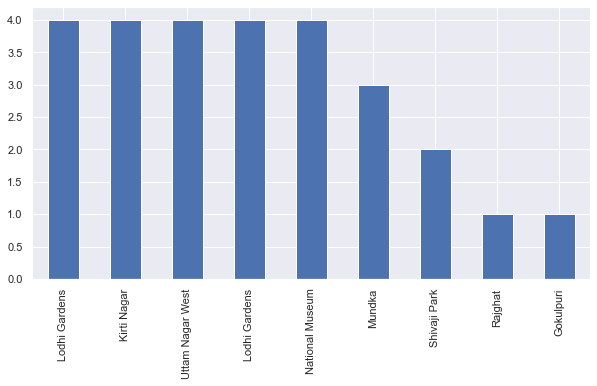

In [354]:
cluster_5 = neighborhoods_venues_sorted[neighborhoods_venues_sorted.Cluster==5]

cluster_5.Neighborhood.value_counts().plot(kind="bar")

This concludes our analysis. We have created 6 collective cluster addresses representing centers of zones containing locations with all the restaurants nearby, all zones being fairly close to each Metro Station (all less than 500 m from each metro station. Although zones are shown on map with a radius of ~500 meters (green circles), their shape is actually very irregular and their centers/addresses should be considered only as a starting point for exploring area neighborhoods in search for potential restaurant locations. Most of the zones are located in Blue Line,Violet Line and Airport Express, which we have identified as interesting due to being long containing more number of stations from other Metro Lines, fairly close to each Metro Station and well connected by other public transport too.

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants/Cafe's in Delhi (~1800 in our initial area of interest which was whole DMRC network), there are pockets of low restaurant density fairly close to some Metro Stations. Highest concentration of Cafeteria's was detected in Cluster 0 and 2 along Blue , Yellow ,Violet and Magenta Line of DMRC, so we focused our attention to areas where Cafe intensity is comparatively low. Another Metro Line was identified as potentially interesting (Magenta_Line and Green Line), but our attention was focused on Cluster 1 which offer a combination of popularity among travellers, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low Cafe density.

After directing our attention to this more narrow area of interest (covering cluster 1) we first created a dense grid of location candidates ; those locations are identified as Tagore Garden,India Gate,Kalkaji Mandir,AIIMS and Laxmi Nagar.
These location candidates are our zones of interest which contain lowest number of existing Cafe's. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 6 zones containing largest number of potential new Cafe locations based on number of and distance to existing venues - both Self Serving Restaurants in general and Cafeteria particularly. This, of course, does not imply that those zones are actually optimal locations for a new Cafeteria! Purpose of this analysis was to only provide info on areas close to Metro Stations but not crowded with existing Self Serving Restaurants (particularly Cafe) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Delhi areas close to DMRC Metro Stations with low number of Self Serving - Restaurants (particularly Cafeteria) in order to aid stakeholders in narrowing down the search for optimal location for a new Cafeteria. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Cluster 1 and 2), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal Cafe location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.